In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    df_test = adfuller(timeseries, autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        plt.tight_layout()
    return

## Анализ ряда "Avocado Prices"

In [5]:
series = pd.read_csv("Series/avocado.csv")['AveragePrice']
series

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                -7.449624e+00
p-value                        5.716069e-11
#Lags Used                     4.500000e+01
Number of Observations Used    1.820300e+04
Critical Value (1%)           -3.430709e+00
Critical Value (5%)           -2.861699e+00
Critical Value (10%)          -2.566855e+00
dtype: float64


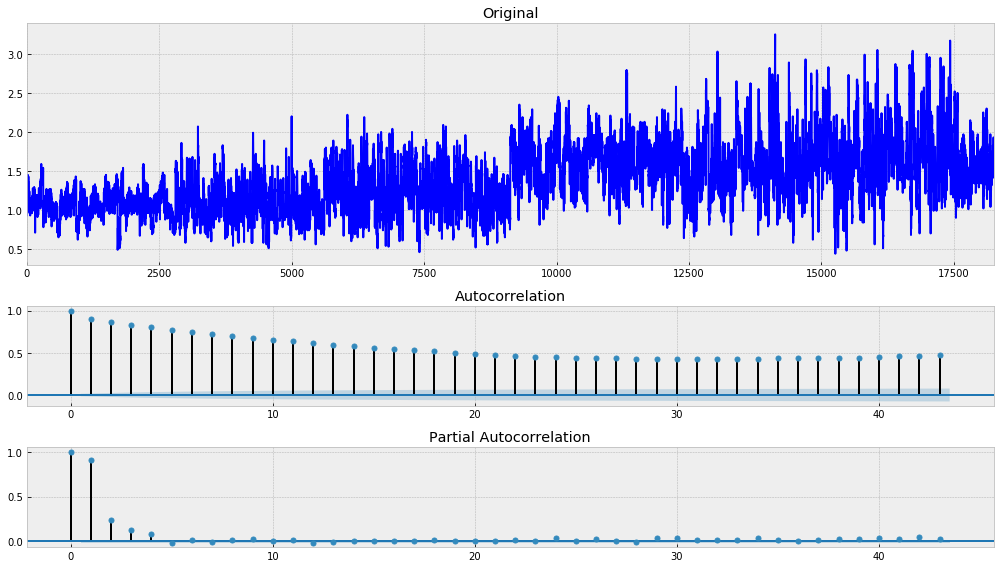

In [6]:
tsplot(series)

In [7]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                -7.518229e+00
p-value                        3.852156e-11
#Lags Used                     4.500000e+01
Number of Observations Used    1.820300e+04
Critical Value (1%)           -3.430709e+00
Critical Value (5%)           -2.861699e+00
Critical Value (10%)          -2.566855e+00
dtype: float64


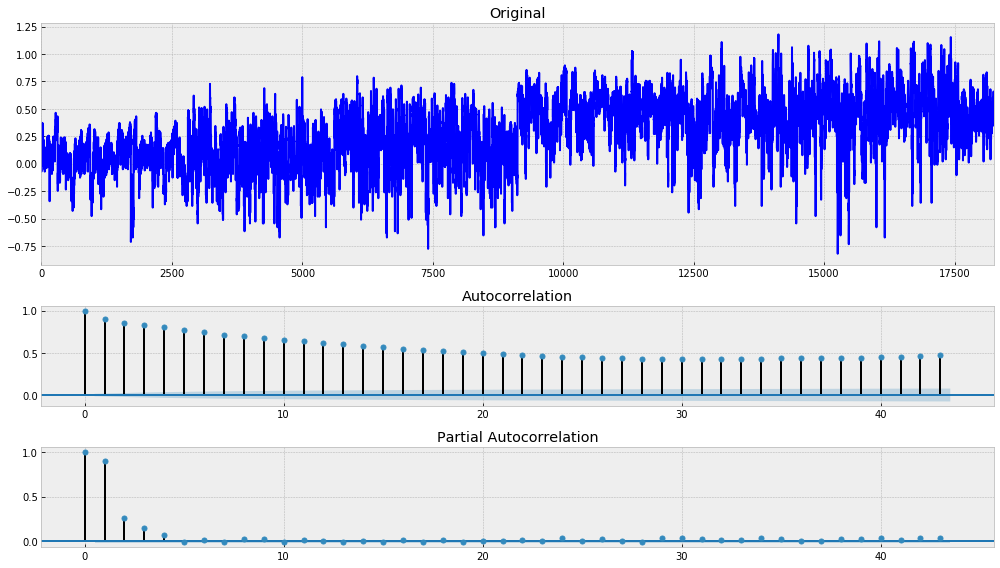

In [8]:
tsplot(series)

In [9]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                   -34.418024
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18202.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861699
Critical Value (10%)              -2.566855
dtype: float64


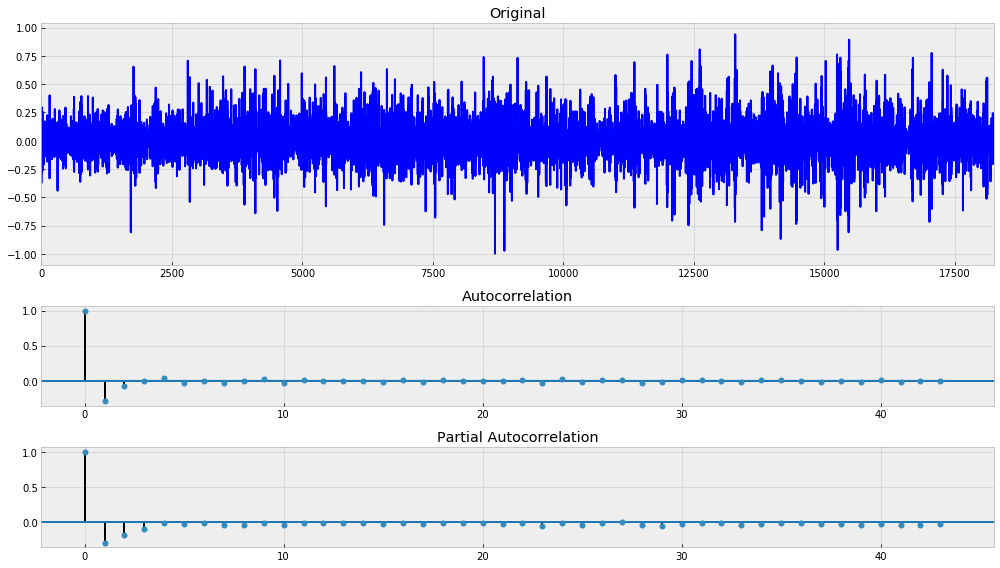

In [10]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## Анализ ряда "Daily total female births in cal"

In [21]:
series1 = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']
series1

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: Count, Length: 365, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


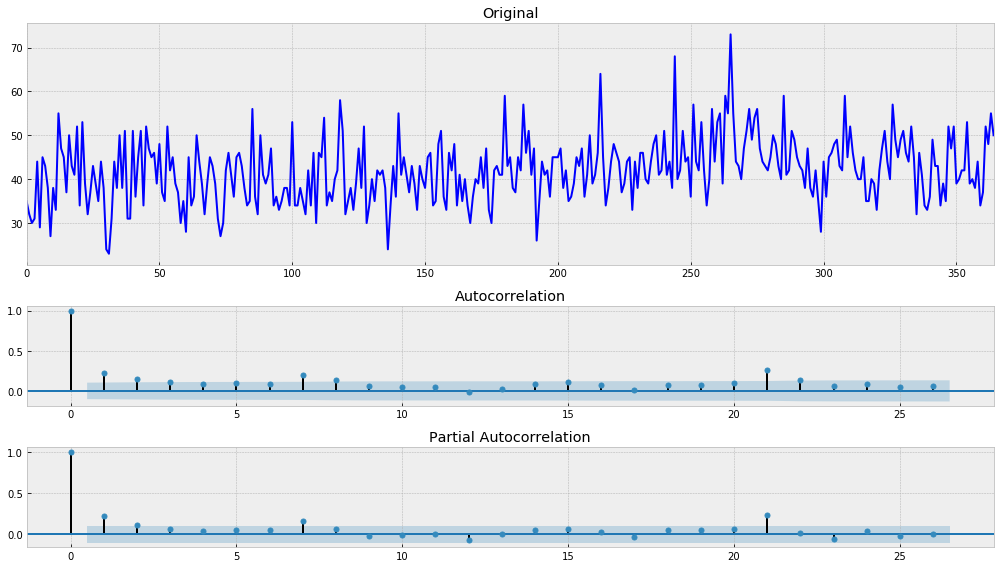

In [22]:
tsplot(series1)

In [23]:
series1 = boxcox(series1, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


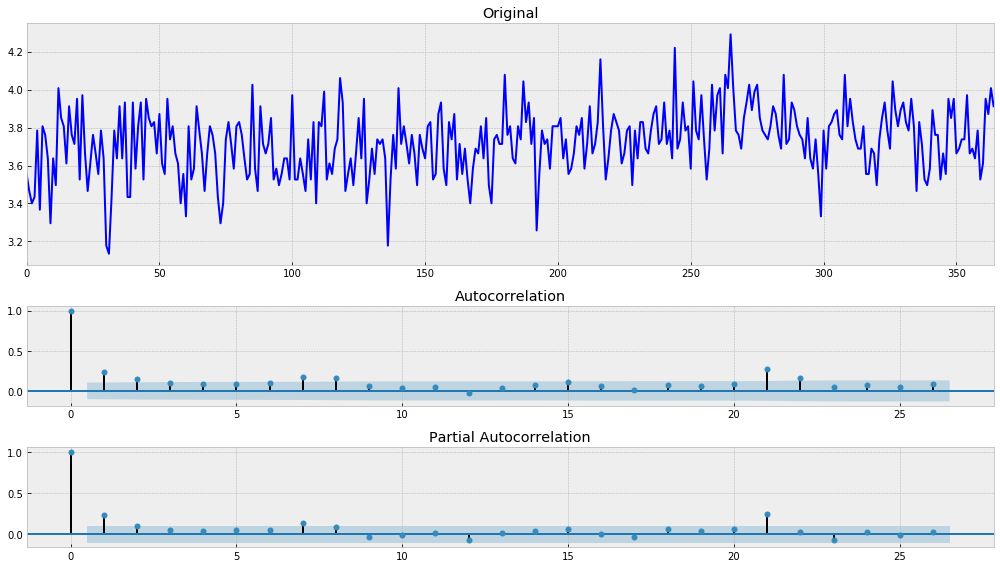

In [24]:
tsplot(series1)

Results of Dickey-Fuller Test:
Test Statistic                -1.003709e+01
p-value                        1.530478e-17
#Lags Used                     1.400000e+01
Number of Observations Used    3.480000e+02
Critical Value (1%)           -3.449282e+00
Critical Value (5%)           -2.869881e+00
Critical Value (10%)          -2.571214e+00
dtype: float64


C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


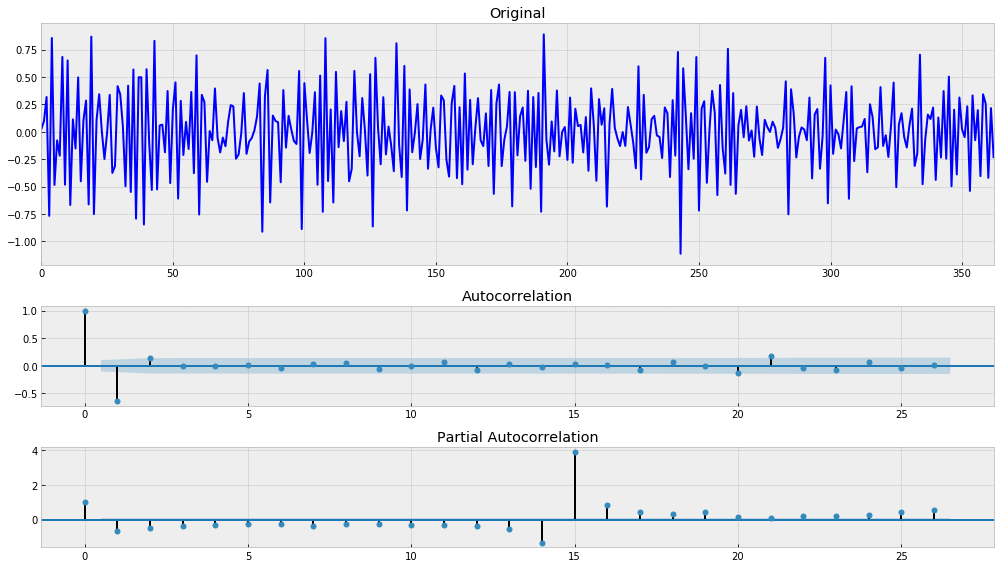

In [26]:
series1 = series1[1:] - series1[:-1]
tsplot(series1)

## Анализ ряда "Monthly sales of company x jan 6"

In [31]:
series2 = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']
series2

0     154
1      96
2      73
3      49
4      36
     ... 
72    628
73    308
74    324
75    248
76    272
Name: Count, Length: 77, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


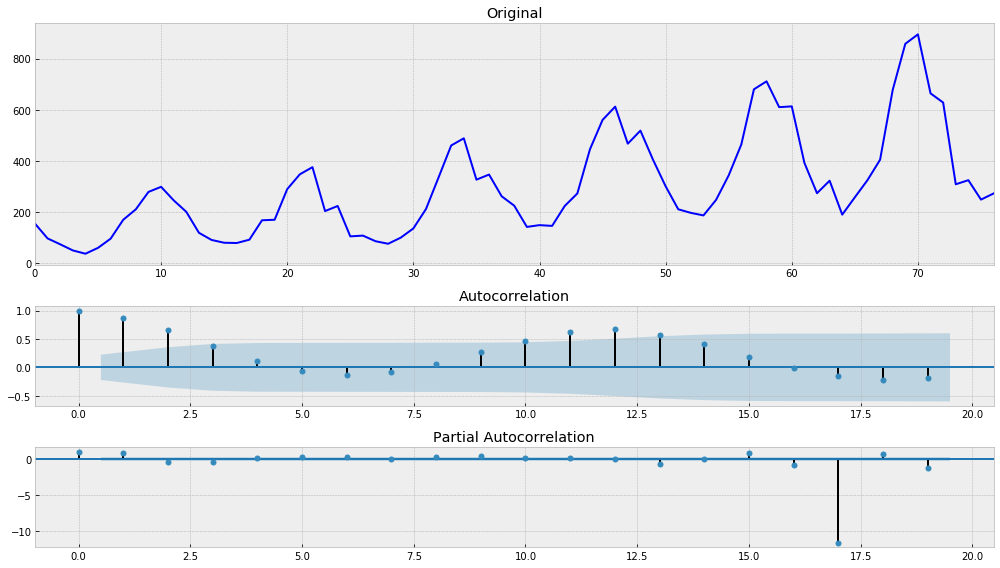

In [32]:
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


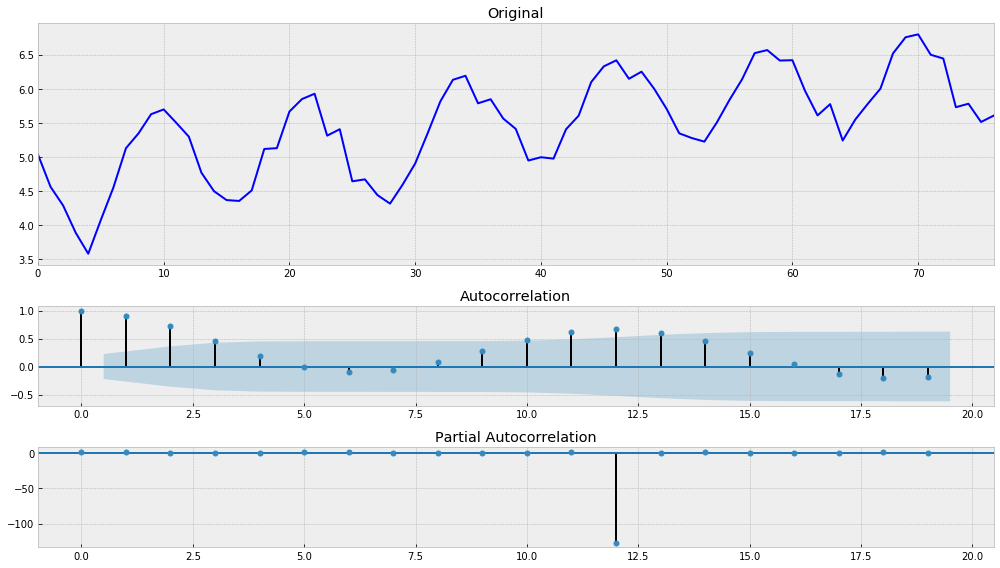

In [33]:
series2 = boxcox(series2, 0)
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


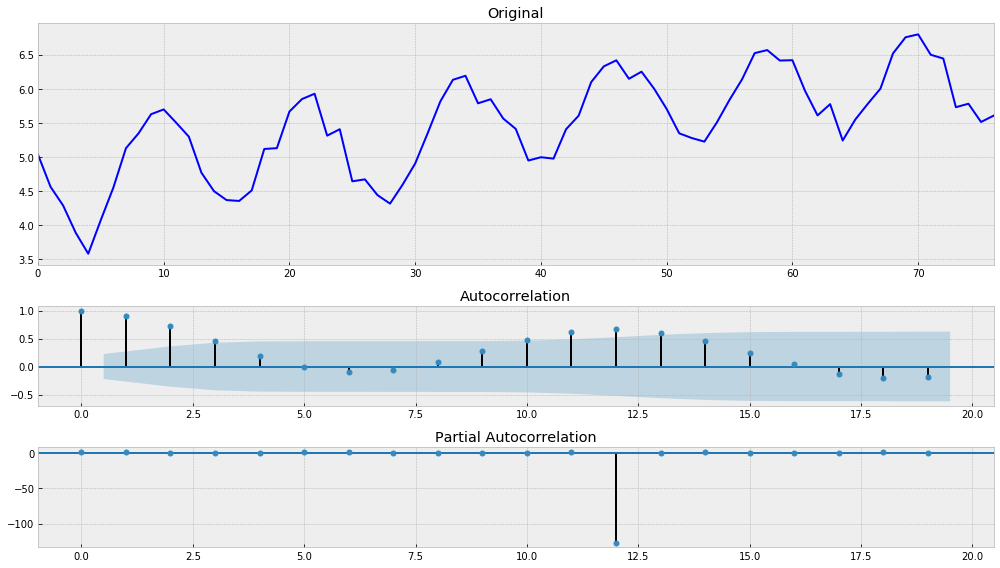

In [29]:
## виден тренд, сезонность (период 12)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


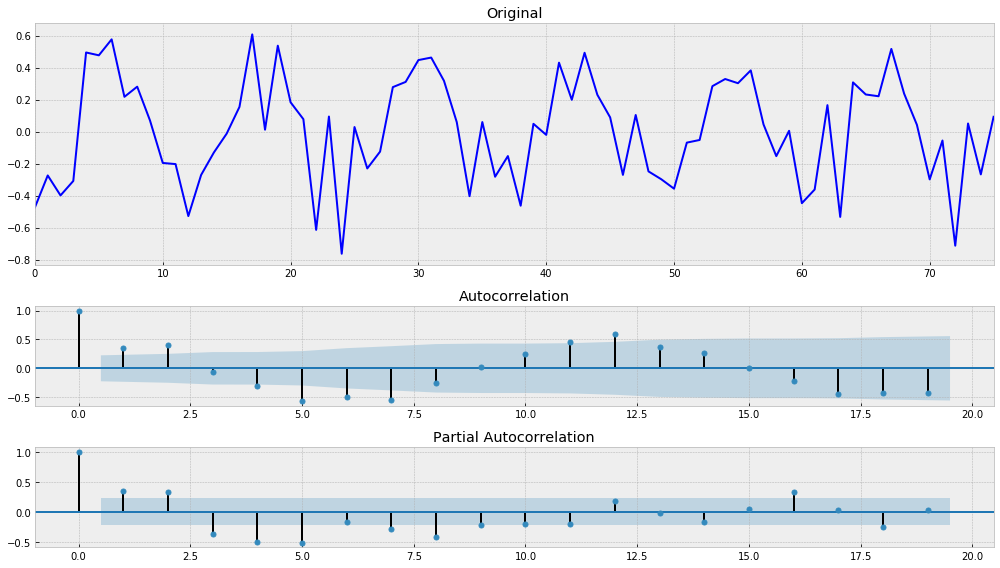

In [34]:
series2 = series2[1:] - series2[:-1]
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -2.421739
p-value                         0.135694
#Lags Used                     10.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


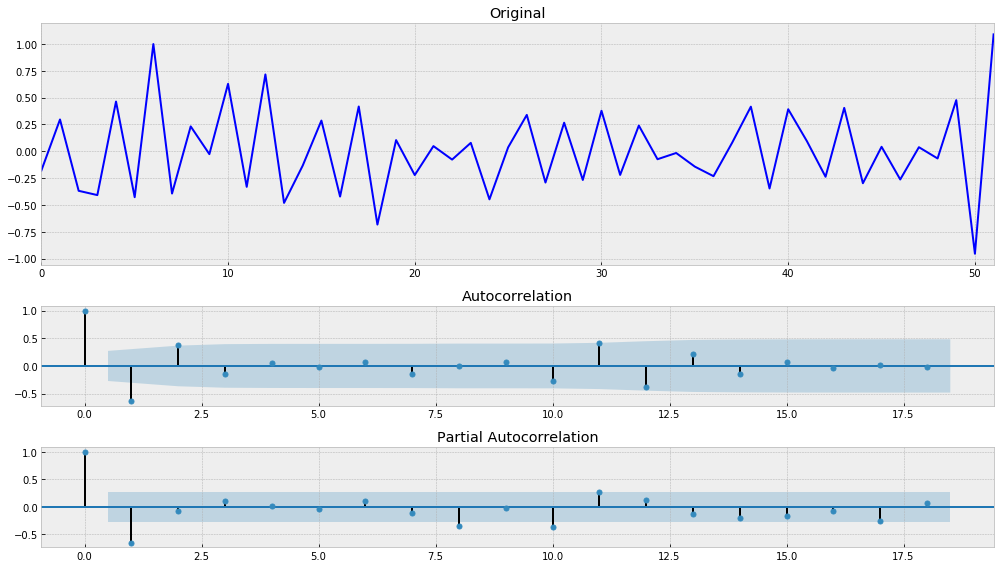

In [36]:
series2 = series2[12:] - series2[:-12]
tsplot(series2)

## Анализ ряда "Mean monthly air temperature deg"

In [38]:
series3 = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']
series3

0      40.6
1      40.8
2      44.4
3      46.7
4      54.1
       ... 
235    61.8
236    58.2
237    46.7
238    46.6
239    37.8
Name: Deg, Length: 240, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


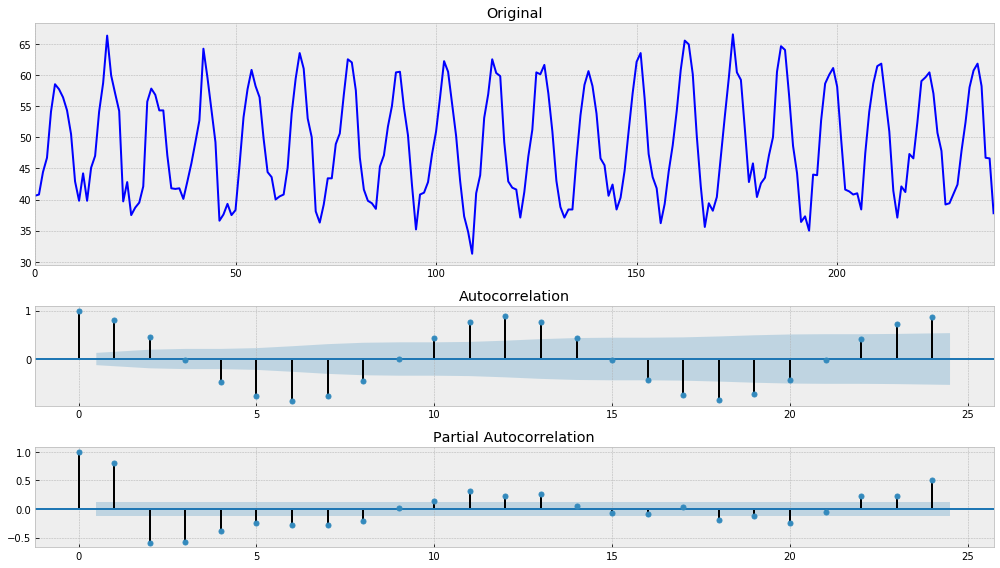

In [39]:
tsplot(series3)

In [40]:
## Тренда нет, есть сезонность (период - 12)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


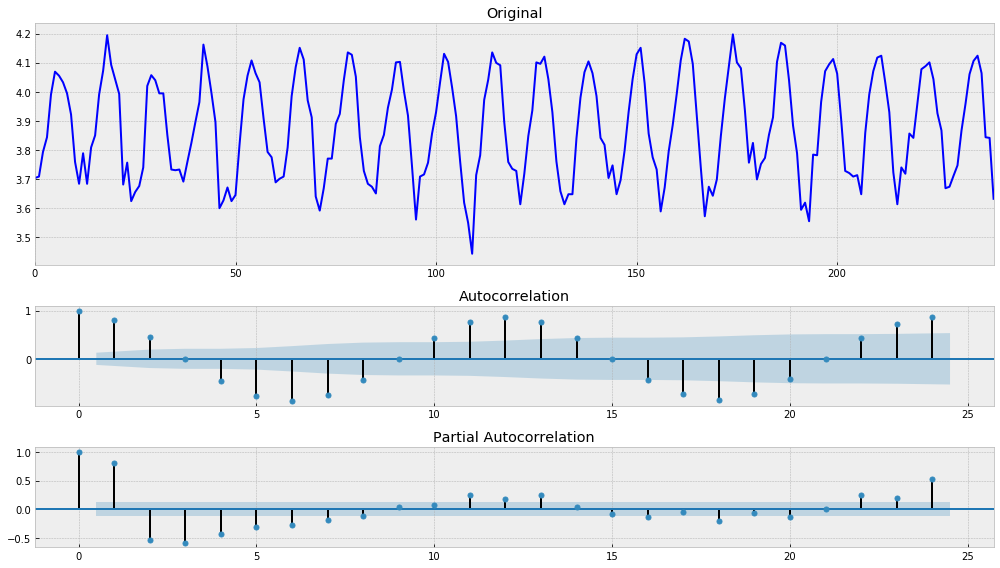

In [41]:
series3 = boxcox(series3, 0)
tsplot(series3)

Results of Dickey-Fuller Test:
Test Statistic                -7.407808e+00
p-value                        7.266548e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.030000e+02
Critical Value (1%)           -3.462980e+00
Critical Value (5%)           -2.875885e+00
Critical Value (10%)          -2.574416e+00
dtype: float64


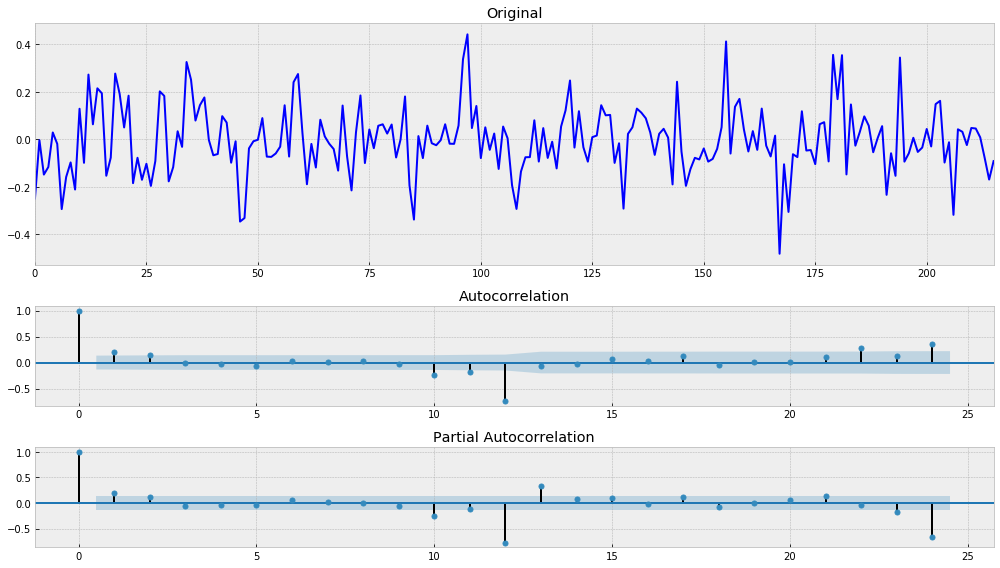

In [43]:
series3 = series3[12:] - series3[:-12]
tsplot(series3)